In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
# most (but not all) classifiers have at least one of `decision_function` or `predict_proba`
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# rename classes for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

# decision_funcion is of shape (n_samples,) and returns one float for each sample
print(X_test.shape)

gbrt.decision_function(X_test).shape

gbrt.decision_function(X_test)

(25, 2)


array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.67391158])

In [27]:
# we can recover the prediction by looking only at the sign of the decision function
[
    gbrt.decision_function(X_test) > 0,
    gbrt.predict(X_test),
]

[array([ True, False, False, False,  True,  True, False,  True,  True,
         True, False,  True,  True, False,  True, False, False, False,
         True,  True,  True,  True,  True, False, False]),
 array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
        'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
        'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')]

In [38]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]

print("{}".format(np.all(pred == gbrt.predict(X_test))))

True


In [40]:
decision_function = gbrt.decision_function(X_test)

[
    np.min(decision_function),
    np.max(decision_function),
]

[np.float64(-7.6909717851019), np.float64(4.289866423997603)]

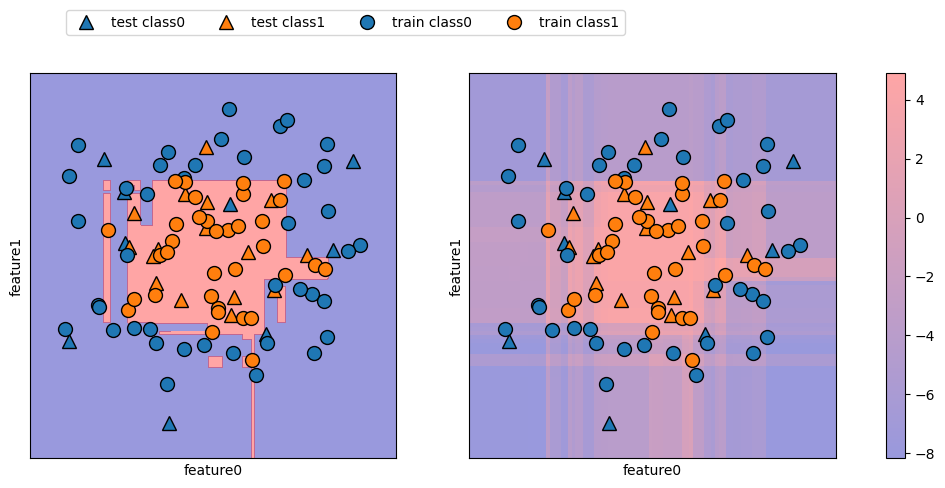

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)

scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class0", "test class1", "train class0", "train class1"], ncol=4, loc=(.1, 1.1))
plt.show()

In [ ]:
"